In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('GDP.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(221, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             221 non-null    object 
 1   IMF_Forecast        189 non-null    float64
 2   IMF_Year            189 non-null    float64
 3   WorldBank_Estimate  209 non-null    float64
 4   WorldBank_Year      209 non-null    float64
 5   UN_Estimate         212 non-null    float64
 6   UN_Year             212 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.2+ KB


In [5]:
df

,Country,IMF_Forecast,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,United States,30507217.0,2025.0,29184890.0,2024.0,27720700.0,2023.0
1,China,19231705.0,2025.0,18743803.0,2024.0,17794782.0,2023.0
2,Germany,4744804.0,2025.0,4659929.0,2024.0,4525704.0,2023.0
3,India,4187017.0,2025.0,3912686.0,2024.0,3575778.0,2023.0
4,Japan,4186431.0,2025.0,4026211.0,2024.0,4204495.0,2023.0
...,...,...,...,...,...,...,...
216,Kiribati,312.0,2025.0,308.0,2024.0,289.0,2023.0
217,Marshall Islands,297.0,2025.0,280.0,2024.0,270.0,2023.0
218,Nauru,169.0,2025.0,160.0,2024.0,176.0,2023.0
219,Montserrat,NaN,NaN,NaN,NaN,80.0,2023.0


Data Analysis

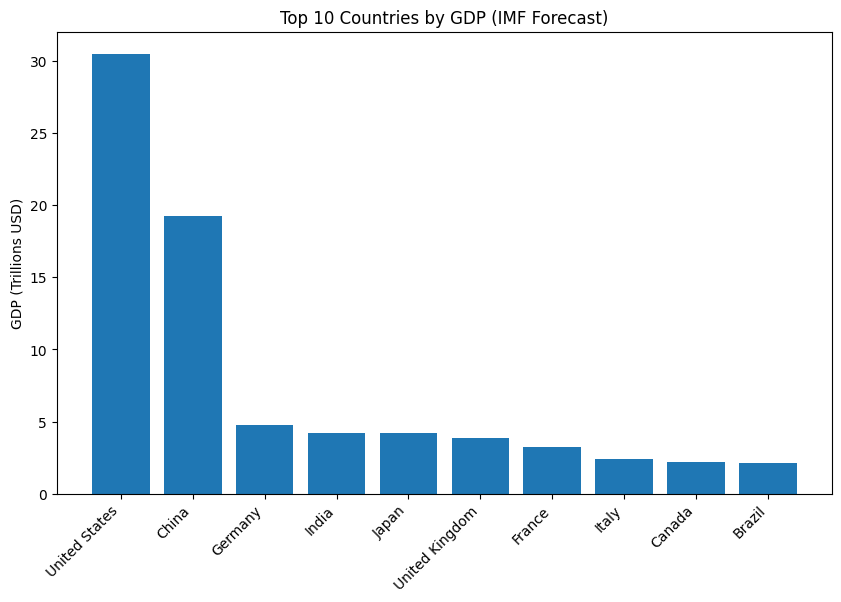

In [6]:
# Top 10 Countries by GDP

top10 = df.sort_values(by="IMF_Forecast", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10["Country"], top10["IMF_Forecast"]/1e6)  # divide by 1e6 → trillion scale
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Countries by GDP (IMF Forecast)")
plt.ylabel("GDP (Trillions USD)")
plt.show()

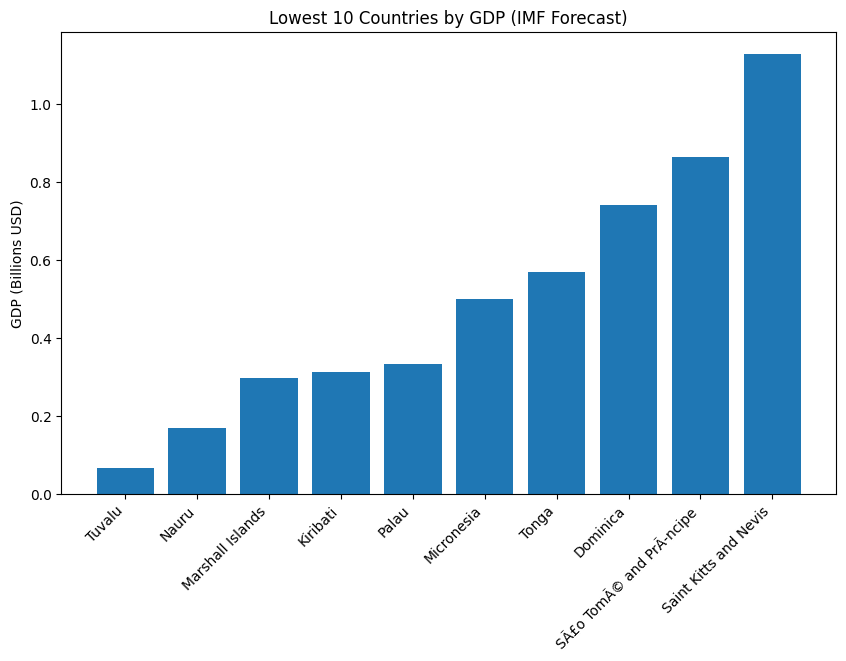

In [7]:
# Lowest 10 countries by GDP
lowest10 = df.sort_values(by="IMF_Forecast", ascending=True).head(10)

plt.figure(figsize=(10,6))
plt.bar(lowest10["Country"], lowest10["IMF_Forecast"]/1e3)  # divide by 1e3 → billion scale
plt.xticks(rotation=45, ha='right')
plt.title("Lowest 10 Countries by GDP (IMF Forecast)")
plt.ylabel("GDP (Billions USD)")
plt.show()

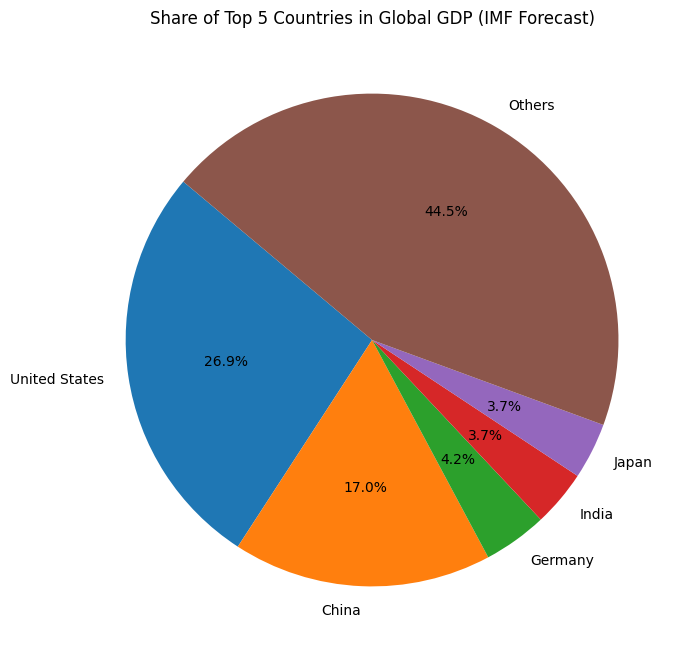

In [11]:
# Share of Top 5 Countries in World GDP

# Total GDP of all countries
total_gdp = df["IMF_Forecast"].sum()

# Top 5 countries
top5 = df.sort_values(by="IMF_Forecast", ascending=False).head(5)

# GDP of "Others"
others_gdp = total_gdp - top5["IMF_Forecast"].sum()

# Add "Others" row
labels = list(top5["Country"]) + ["Others"]
sizes = list(top5["IMF_Forecast"]) + [others_gdp]

# Pie chart
plt.figure(figsize=(8,8))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Share of Top 5 Countries in Global GDP (IMF Forecast)")
plt.show()


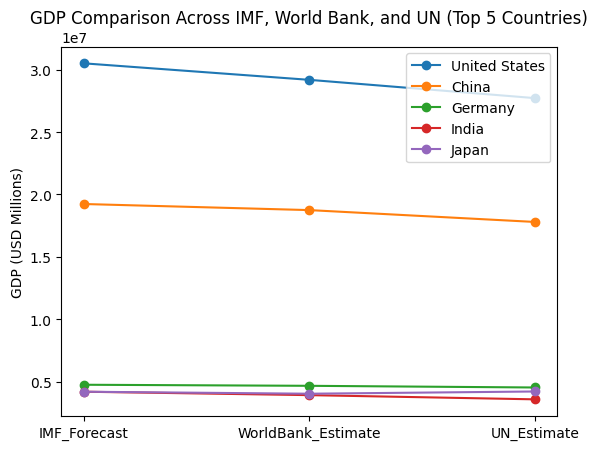

In [12]:
# IMF vs World Bank vs UN GDP estimates for Top 5 Countries
for _, row in top5.iterrows():
    plt.plot(
        ["IMF_Forecast", "WorldBank_Estimate", "UN_Estimate"],
        [row["IMF_Forecast"], row["WorldBank_Estimate"], row["UN_Estimate"]],
        marker="o", label=row["Country"]
    )

plt.title("GDP Comparison Across IMF, World Bank, and UN (Top 5 Countries)")
plt.ylabel("GDP (USD Millions)")
plt.legend()
plt.show()

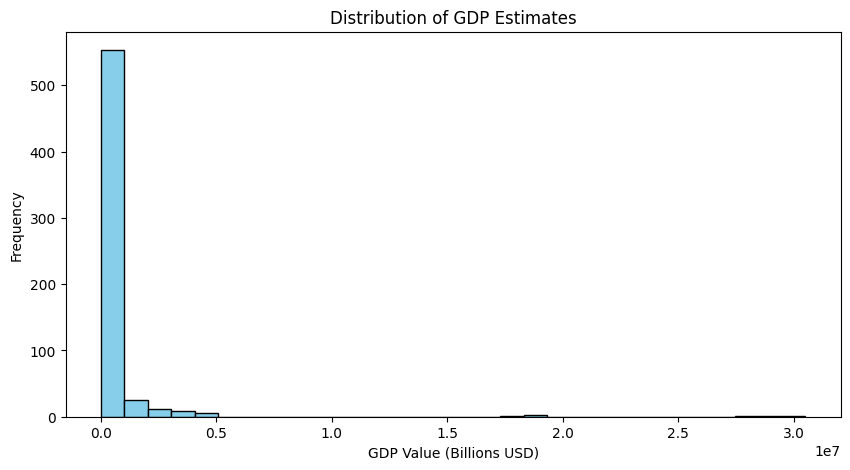

In [16]:
# Spread of GDP Values
# Combine GDP values into a single series for plotting
gdp_values = pd.concat([
    df["IMF_Forecast"].dropna(),
    df["WorldBank_Estimate"].dropna(),
    df["UN_Estimate"].dropna()
])

# Histogram
plt.figure(figsize=(10,5))
plt.hist(gdp_values, bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of GDP Estimates")
plt.xlabel("GDP Value (Billions USD)")
plt.ylabel("Frequency")
plt.show()

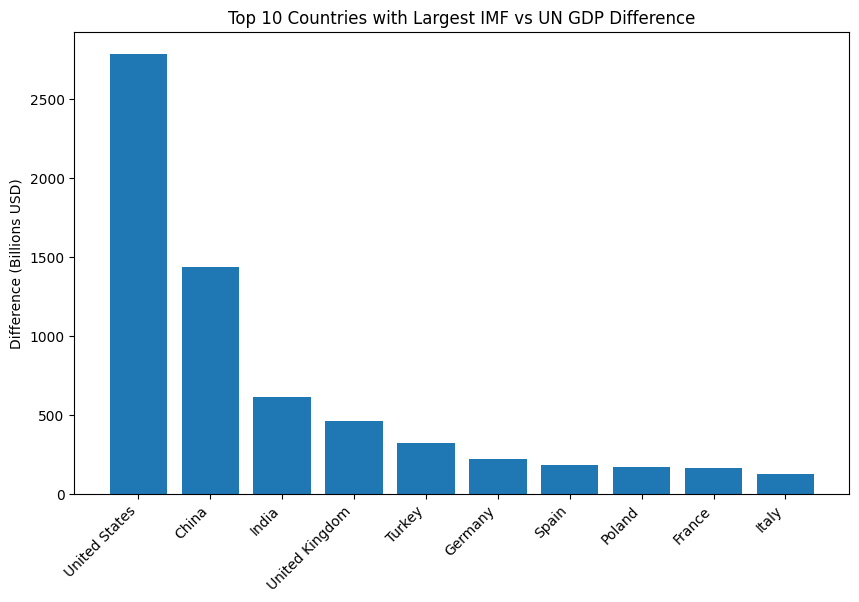

In [18]:
# GDP Difference Between IMF and UN
df["Diff_IMF_UN"] = df["IMF_Forecast"] - df["UN_Estimate"]
top_diff = df.sort_values(by="Diff_IMF_UN", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top_diff["Country"], top_diff["Diff_IMF_UN"]/1e3)
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Countries with Largest IMF vs UN GDP Difference")
plt.ylabel("Difference (Billions USD)")
plt.show()